In [53]:
import pandas as pd
import io
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
def get_dataframe(name):
    df = pd.read_csv(f'{name}.csv')
    df = df.dropna()
    return df

In [55]:
name = "CHL5230-F23-Datathon #1-Dataset1"
df = get_dataframe(name)
df.head()

,Age,Gender,Calorie_Intake,Sugar_Intake,Physical_Activity,Fast_Food_Frequency,Screen_Time,Height,Weight,BMI
0,56,Female,3091,90,160,4,1,1.569070,81.199394,32.981343
1,69,Female,2090,106,27,0,9,1.629449,74.273566,27.973877
2,46,Male,2938,11,45,2,3,1.637726,71.453466,26.640417
3,32,Female,3022,48,112,1,8,1.514198,98.163045,42.813720
4,60,Female,2350,83,115,0,7,1.410559,57.323914,28.810685


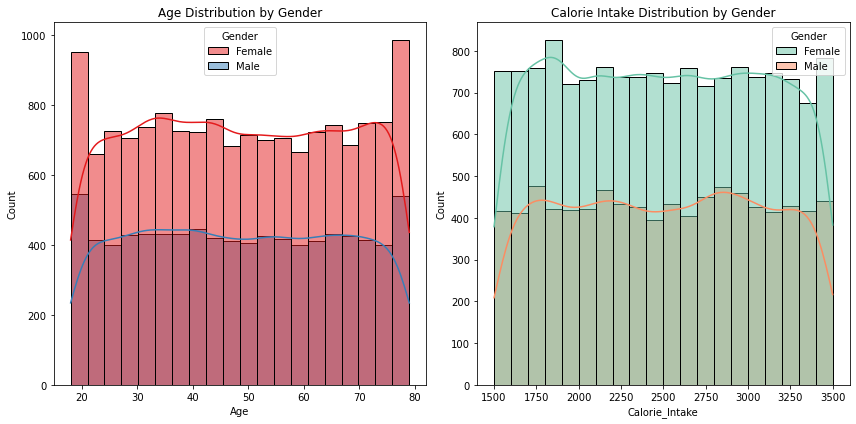

In [56]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Age', bins=20, kde=True, hue='Gender', palette='Set1')
plt.title('Age Distribution by Gender')

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='Calorie_Intake', bins=20, kde=True, hue='Gender', palette='Set2')
plt.title('Calorie Intake Distribution by Gender')

plt.tight_layout()
plt.show()


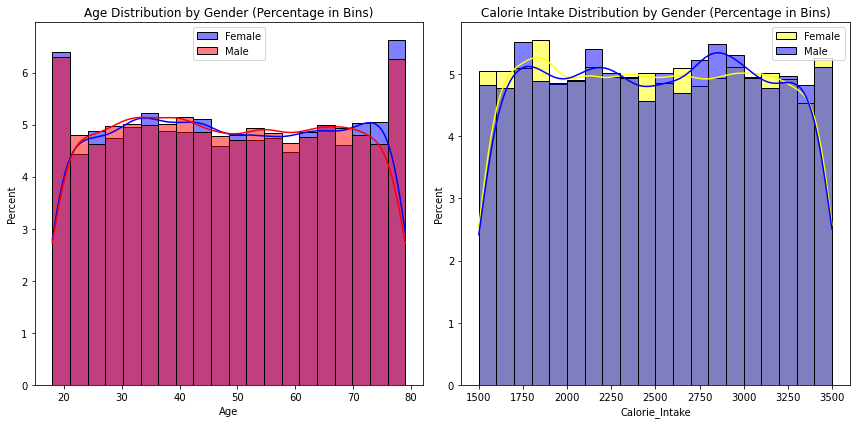

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Separate the data by gender
df_female = df[df['Gender'] == 'Female']
df_male = df[df['Gender'] == 'Male']

# Create histograms for Age percentage distribution by Gender
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=df_female, x='Age', bins=20, kde=True, stat='percent', label='Female', color='blue')
sns.histplot(data=df_male, x='Age', bins=20, kde=True, stat='percent', label='Male', color='red')
plt.title('Age Distribution by Gender (Percentage in Bins)')
plt.legend()

# Create histograms for Calorie_Intake percentage distribution by Gender
plt.subplot(1, 2, 2)
sns.histplot(data=df_female, x='Calorie_Intake', bins=20, kde=True, stat='percent', label='Female', color='yellow')
sns.histplot(data=df_male, x='Calorie_Intake', bins=20, kde=True, stat='percent', label='Male', color='blue')
plt.title('Calorie Intake Distribution by Gender (Percentage in Bins)')
plt.legend()

plt.tight_layout()
plt.show()


![BMI categories](./Bmi-chart-1.jpg)

In [58]:
bmi_bins = [0, 18.5, 25, 30, 40, float('inf')]
bmi_labels = ['Underweight', 'Healthy', 'Overweight', 'Obese', 'Severely Obese']
df['BMI'] = pd.cut(df['BMI'], bins=bmi_bins, labels=bmi_labels)
df.head()

,Age,Gender,Calorie_Intake,Sugar_Intake,Physical_Activity,Fast_Food_Frequency,Screen_Time,Height,Weight,BMI
0,56,Female,3091,90,160,4,1,1.569070,81.199394,Obese
1,69,Female,2090,106,27,0,9,1.629449,74.273566,Overweight
2,46,Male,2938,11,45,2,3,1.637726,71.453466,Overweight
3,32,Female,3022,48,112,1,8,1.514198,98.163045,Severely Obese
4,60,Female,2350,83,115,0,7,1.410559,57.323914,Overweight


In [59]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['BMI'] = df['BMI'].map({'Underweight': 0, 'Healthy': 1, 'Overweight': 2, 'Obese': 3, 'Severely Obese': 4})
df.head()

,Age,Gender,Calorie_Intake,Sugar_Intake,Physical_Activity,Fast_Food_Frequency,Screen_Time,Height,Weight,BMI
0,56,1,3091,90,160,4,1,1.569070,81.199394,3
1,69,1,2090,106,27,0,9,1.629449,74.273566,2
2,46,0,2938,11,45,2,3,1.637726,71.453466,2
3,32,1,3022,48,112,1,8,1.514198,98.163045,4
4,60,1,2350,83,115,0,7,1.410559,57.323914,2


In [60]:
name = "CHL5230-F23-Datathon#1-Dataset2"
df2 = get_dataframe(name)
df2.head()

,Age,Gender,Air Pollution,Alcohol Usage,Genetic Risk,Lung Disease,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Severity
0,33,1,2,4,3,2,4,3,2,2,4,0
1,17,1,3,1,4,2,2,2,4,2,3,1
2,35,1,4,5,5,4,7,2,3,4,8,2
3,37,1,7,7,6,7,7,7,7,7,8,2
4,46,1,6,8,7,6,7,8,7,7,9,2


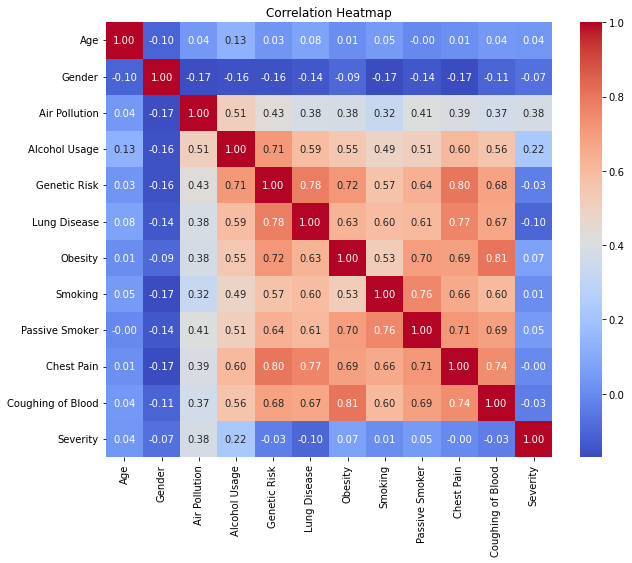

In [62]:
correlation_matrix = df2.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()